# Variance-level plots

### Classes and modules

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
import datetime
from IPython.display import display
import copy

#For plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"

import pycuda.driver as cuda

GPU Ocean-modules:

In [2]:
from gpuocean.utils import IPythonMagic, Common
from gpuocean.SWEsimulators import CDKLM16, ModelErrorKL

In [3]:
%cuda_context_handler gpu_ctx

In [4]:
gpu_stream = cuda.Stream()

Utils

In [5]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))
from utils.BasinInit import *
from utils.BasinAnalysis import *
from utils.BasinPlot import *

In [6]:
ls = [6, 7, 8, 9, 10]

In [7]:
grid_args_list = []

for l in ls:
    lvl_grid_args = initGridSpecs(l)
    grid_args_list.append( {
        "nx": lvl_grid_args["nx"],
        "ny": lvl_grid_args["ny"],
        "dx": lvl_grid_args["dx"],
        "dy": lvl_grid_args["dy"],
        } )

Test

In [8]:
source_path = "/home/florianb/havvarsel/multilevelDA/scripts/VarianceLevelsDA/Basin/2023-08-30T13_04_26"

In [9]:
states = [[np.load(source_path+"/SLensemble_"+str(l_idx)+"_"+str(t)+".npy") for l_idx in range(len(ls))] for t in [0, 15*60, 3600, 6*3600, 12*3600] ]

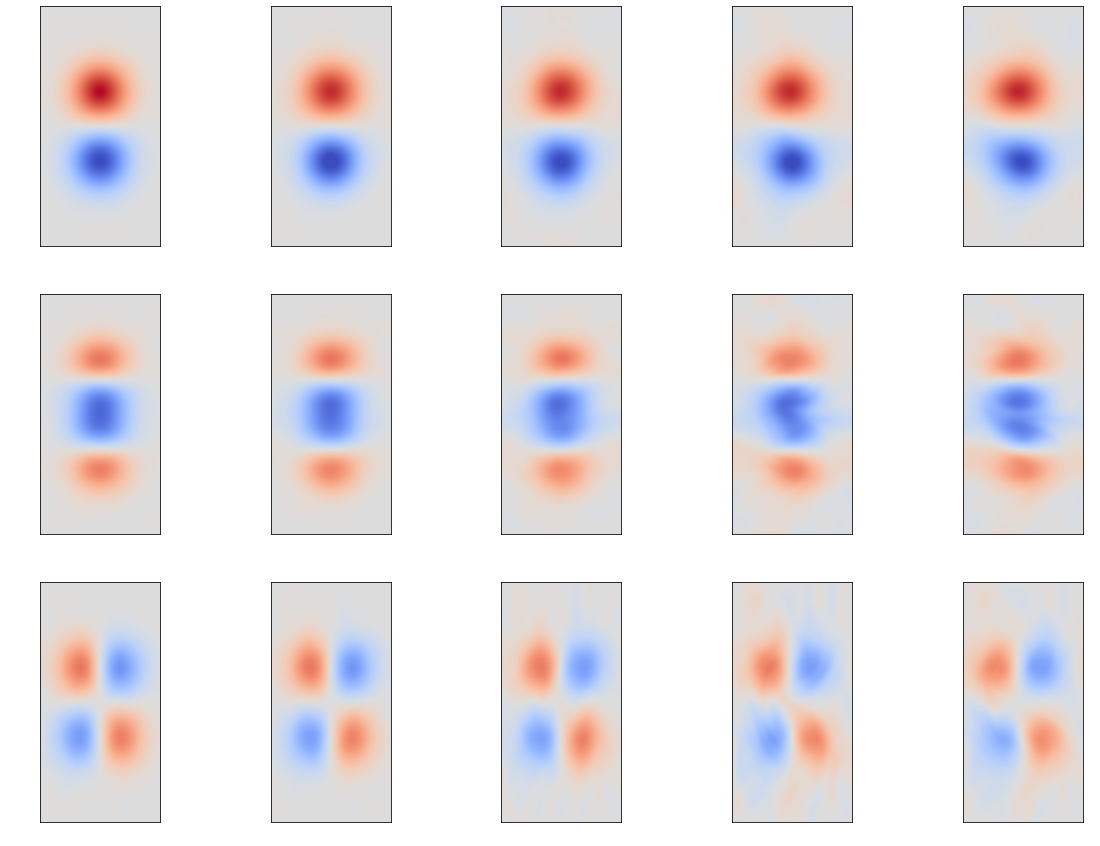

In [20]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(3,5, figsize=(20,15))

vlims = [3, 100, 100]

for i in range(3):
    for t in range(5):
        im = axs[i,t].imshow(np.mean(states[t][-1],axis=-1)[i], cmap=plt.cm.coolwarm, vmin=-vlims[i], vmax=vlims[i])
    

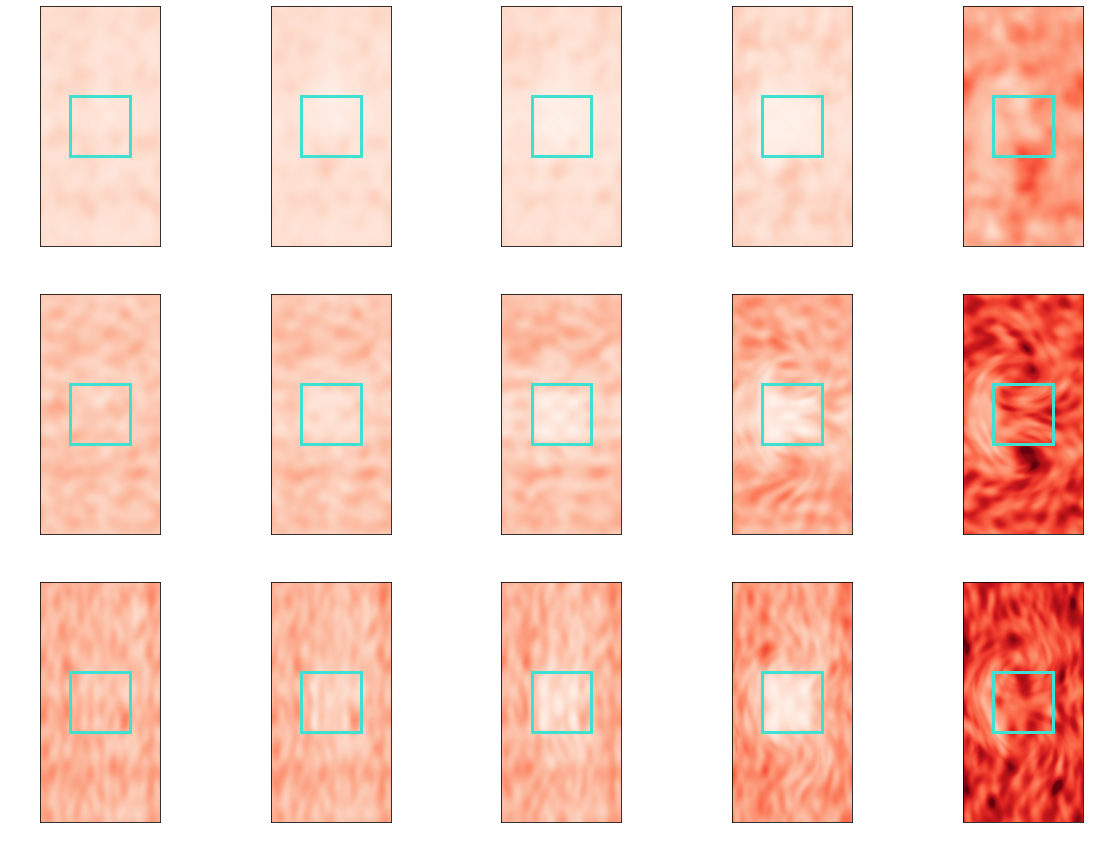

In [23]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(3,5, figsize=(20,15))

vmaxs = [0.05, 100, 100]

for i in range(3):
    for t in range(5):
        im = axs[i,t].imshow(np.var(states[t][-1],axis=-1)[i], cmap=plt.cm.Reds, vmin=0, vmax=vmaxs[i])
        axs[i,t].add_patch(Rectangle((256, 512+256), 512, 512, edgecolor="turquoise", lw=3, fill=False))

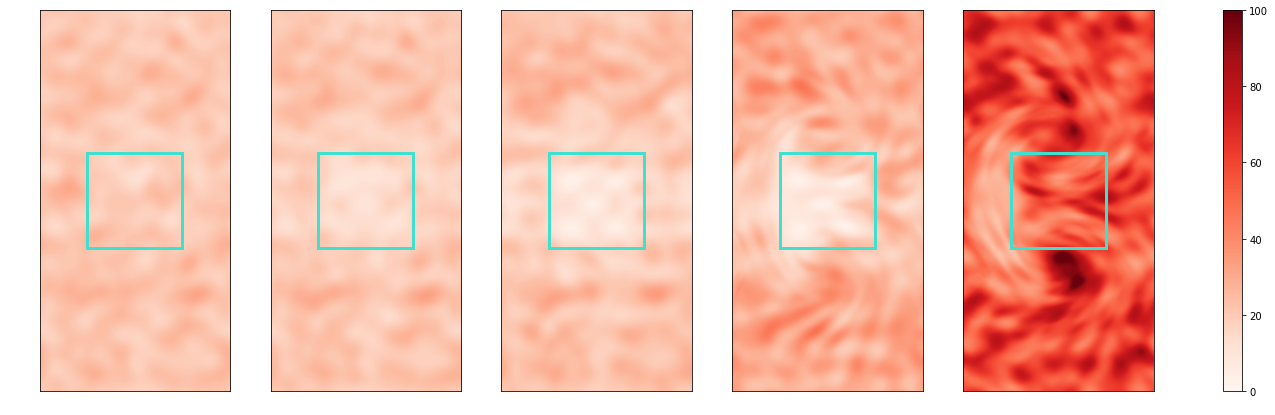

In [49]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(1,5, figsize=(25,7))

for t in range(5):
    im = axs[t].imshow(np.var(states[t][-1],axis=-1)[1], cmap=plt.cm.Reds, vmin=0, vmax=100)
    axs[t].add_patch(Rectangle((256, 512+256), 512, 512, edgecolor="turquoise", lw=3, fill=False))

cb = fig.colorbar(im, ax=axs.ravel().tolist())
cb.ax.yaxis.set_tick_params(color="black", labelcolor="black")
                                                                                         
plt.savefig(source_path+"/var_t_hu.pdf", bbox_inches="tight")

In [24]:
from utils.BasinSL import *

def g_functional(SL_ensemble):
    """
    L_g functional as in notation of Kjetil's PhD thesis.
    This should be the functional that is under investigation for the variance level plot

    Returns a ndarray of same size as SL_ensemble (3, ny, nx, Ne)
    """
    return (SL_ensemble - np.mean(SL_ensemble, axis=-1)[:,:,:,np.newaxis])**2
    # return SL_ensemble

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

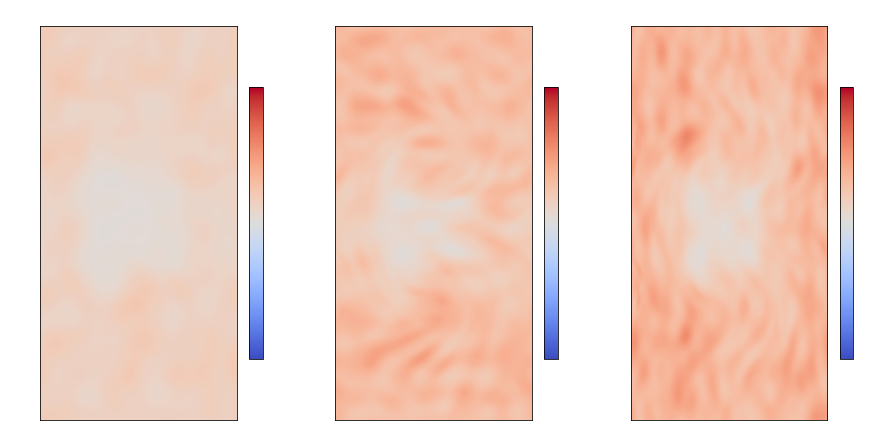

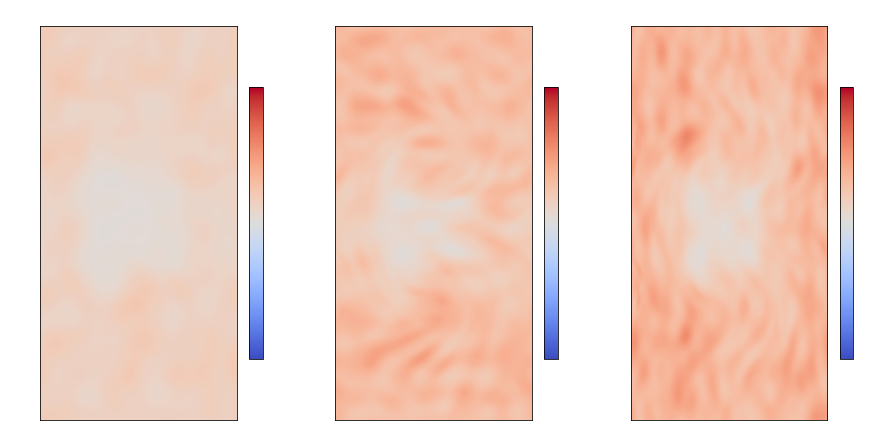

In [34]:
imshow3(np.mean(g_functional(states[-2][-1]), axis=-1), eta_vlim=0.05)
imshow3(np.var(states[-2][-1], axis=-1), eta_vlim=0.05)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

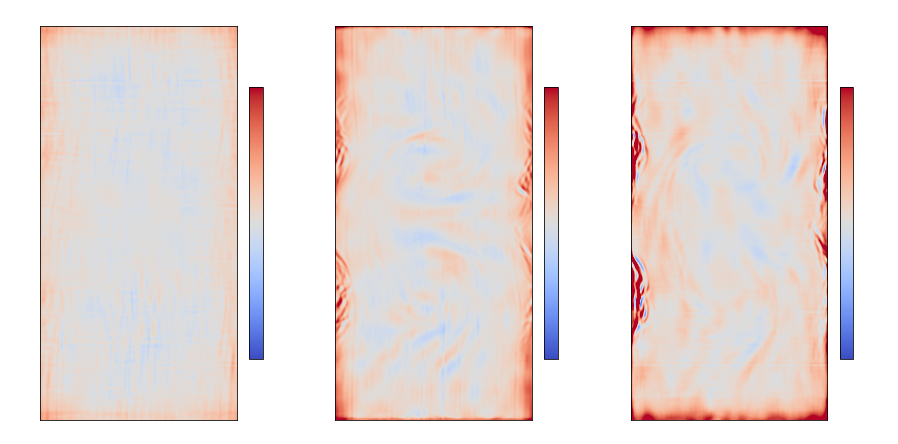

In [40]:
imshow3(np.mean(g_functional(states[-2][-1]) - g_functional(states[-2][-2]).repeat(2,1).repeat(2,2), axis=-1), eta_vlim=5e-4, huv_vlim=1)

(<Figure size 1080x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\eta$'}>,
        <AxesSubplot:title={'center':'$hu$'}>,
        <AxesSubplot:title={'center':'$hv$'}>], dtype=object))

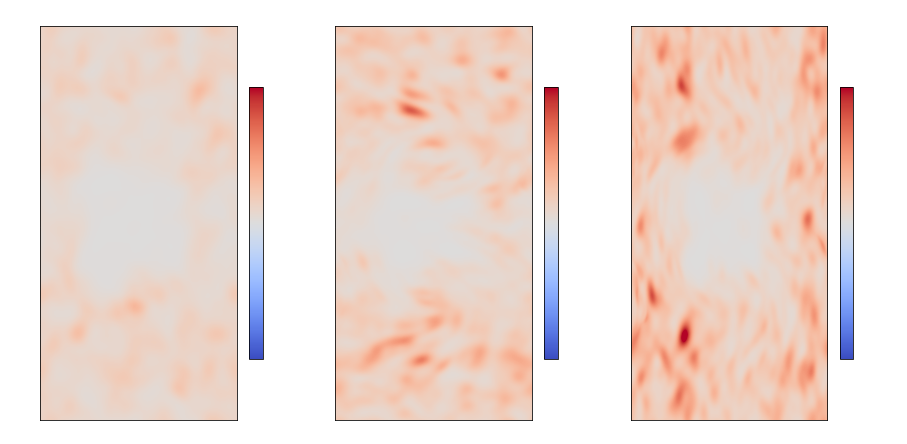

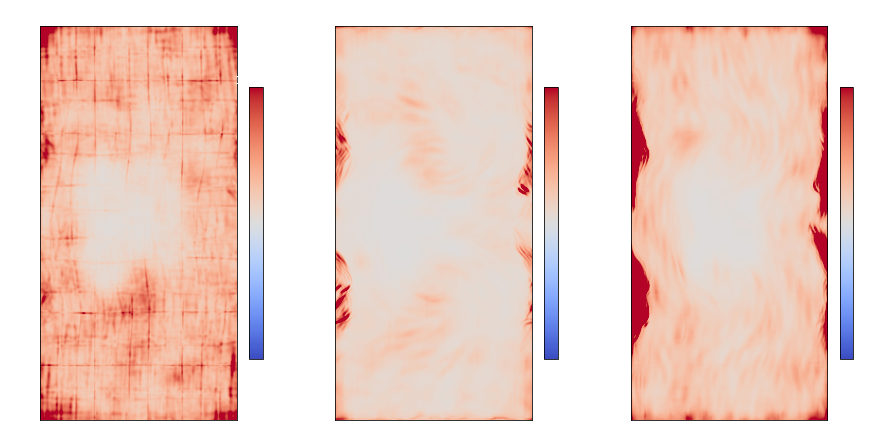

In [51]:
imshow3(np.var(g_functional(states[-2][-1]), axis=-1), eta_vlim=1e-3, huv_vlim=1e4)
imshow3(np.var(g_functional(states[-2][-1]) - g_functional(states[-2][-2]).repeat(2,1).repeat(2,2), axis=-1), eta_vlim=1e-7, huv_vlim=5)